In [3]:
%matplotlib inline
 
import numpy as np
import matplotlib.pyplot as plt
import imageio
import pandas as pd

[[101 106 102 ... 108 107 108]
 [101 104 102 ... 106 108 105]
 [ 99 104 102 ... 108 106 111]
 ...
 [ 64  69  75 ...  42  48  48]
 [ 74  81  85 ...  46  48  44]
 [ 77  83  84 ...  46  50  45]]


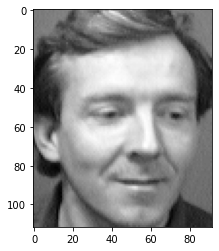

In [4]:
im = imageio.imread('imagenes/s3/3.pgm')
im = im.astype(np.uint8)

print(im)
plt.imshow(im, cmap = 'gray')

In [11]:
im.shape

(112, 92)

In [5]:
print('Max original', end = ' ')
print(np.amax(im))
print('Min original', end = ' ')
print(np.amin(im))

Max original 204
Min original 10


In [6]:
#Normalizamos
im_original = im
im = im/255

print('Max original', end = ' ')
print(np.amax(im))
print('Min original', end = ' ')
print(np.amin(im))

Max original 0.8
Min original 0.0392156862745098


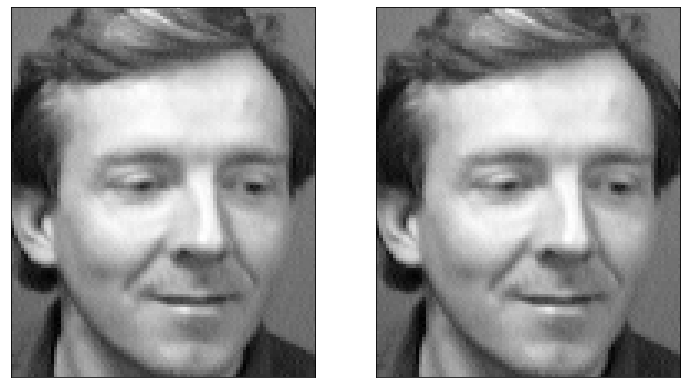

In [7]:
#a pesar de que se normaliza no hay diferencias en las proyecciones de la imagenes
fix, ax  = plt.subplots(1, 2 , figsize = (12,12), subplot_kw = {'xticks' : [], 'yticks' : []})

ax[0].imshow(im_original, cmap = 'gray')
ax[1].imshow(im, cmap = 'gray')

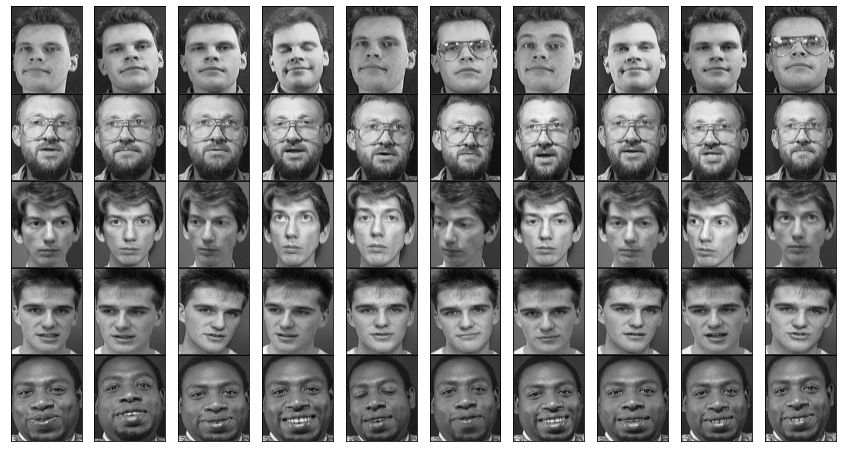

In [8]:
#leeremos todas las imagenes que tenemos en la carpeta imagenes
#creamos una matriz donde en cada fila esta una imagen (con la cara de la persona)
from glob import iglob

caras = pd.DataFrame([])

for path in iglob('imagenes/*/*.pgm'):
    im = imageio.imread(path)
    cara = pd.Series(im.flatten(), name = path)
    caras = caras.append(cara)
    
fig, axes = plt.subplots(5, 10, figsize= (15, 8),
                         subplot_kw = {'xticks':[], 'yticks':[]},
                         gridspec_kw = dict(hspace = 0.01, wspace = 0.01))
#Para poder plotear reformamos la matriz, conviendo cada fila en matriz y dibujando
for i, ax in enumerate(axes.flat):
    ax.imshow(caras.iloc[i].values.reshape(112,92), cmap = 'gray')


In [9]:
caras

,0,1,2,3,4,5,6,7,8,9,...,10294,10295,10296,10297,10298,10299,10300,10301,10302,10303
imagenes/s36/2.pgm,46.0,45.0,47.0,47.0,47.0,47.0,42.0,44.0,46.0,44.0,...,46.0,44.0,41.0,35.0,38.0,35.0,51.0,46.0,50.0,50.0
imagenes/s36/4.pgm,48.0,43.0,51.0,46.0,47.0,45.0,46.0,49.0,47.0,47.0,...,152.0,150.0,135.0,177.0,102.0,19.0,42.0,45.0,42.0,39.0
imagenes/s36/3.pgm,48.0,42.0,52.0,42.0,48.0,47.0,48.0,44.0,50.0,46.0,...,146.0,176.0,77.0,25.0,41.0,42.0,43.0,46.0,51.0,48.0
imagenes/s36/5.pgm,62.0,64.0,64.0,66.0,66.0,64.0,63.0,65.0,67.0,63.0,...,80.0,73.0,77.0,76.0,52.0,47.0,52.0,45.0,44.0,52.0
imagenes/s36/6.pgm,46.0,41.0,45.0,49.0,48.0,51.0,47.0,40.0,44.0,50.0,...,43.0,41.0,35.0,46.0,50.0,38.0,35.0,37.0,34.0,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
imagenes/s11/9.pgm,50.0,46.0,49.0,49.0,55.0,47.0,46.0,53.0,50.0,51.0,...,27.0,26.0,33.0,25.0,31.0,29.0,32.0,33.0,33.0,41.0
imagenes/s11/7.pgm,47.0,47.0,47.0,49.0,45.0,51.0,49.0,50.0,47.0,52.0,...,28.0,32.0,24.0,36.0,26.0,32.0,31.0,30.0,35.0,33.0
imagenes/s11/1.pgm,48.0,46.0,49.0,46.0,48.0,46.0,51.0,46.0,48.0,49.0,...,29.0,26.0,38.0,25.0,30.0,31.0,31.0,31.0,31.0,36.0
imagenes/s11/8.pgm,47.0,49.0,46.0,47.0,51.0,47.0,51.0,47.0,52.0,48.0,...,28.0,31.0,26.0,26.0,28.0,28.0,26.0,31.0,32.0,34.0


In [10]:
from sklearn.decomposition import PCA

In [44]:
caras_pca = PCA(n_components = 0.999)
caras_pca.fit(caras)

PCA(n_components=0.999)

In [45]:
caras_pca.explained_variance_ratio_

array([1.76095498e-01, 1.29066363e-01, 6.84104245e-02, 5.57894284e-02,
       5.10991269e-02, 3.36253367e-02, 2.44719675e-02, 2.33106436e-02,
       1.96220218e-02, 1.80278054e-02, 1.43892342e-02, 1.39792244e-02,
       1.11904032e-02, 1.06727411e-02, 9.74647162e-03, 9.13625429e-03,
       8.76041953e-03, 8.44452375e-03, 7.35490639e-03, 6.95367367e-03,
       6.70946576e-03, 6.38509695e-03, 5.93075539e-03, 5.43796632e-03,
       5.29091378e-03, 4.93587233e-03, 4.81332012e-03, 4.78885855e-03,
       4.48026254e-03, 4.36140092e-03, 4.29075583e-03, 3.99166544e-03,
       3.94501164e-03, 3.80308757e-03, 3.69536275e-03, 3.50370094e-03,
       3.39997182e-03, 3.36425761e-03, 3.17379273e-03, 3.00237272e-03,
       2.95352893e-03, 2.90716406e-03, 2.81769775e-03, 2.77597282e-03,
       2.67932527e-03, 2.58719398e-03, 2.54260910e-03, 2.48915523e-03,
       2.44768275e-03, 2.39954662e-03, 2.35481887e-03, 2.19706592e-03,
       2.16731972e-03, 2.13554397e-03, 2.12465488e-03, 2.05380044e-03,
      

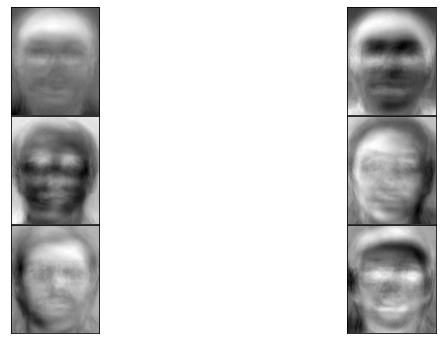

In [30]:
filas = 3
columnas = caras_pca.n_components_//filas

fig, axes = plt.subplots(filas, columnas, figsize = (12, 6),
                        subplot_kw = {'xticks':[], 'yticks':[]},
                        gridspec_kw = dict(hspace = 0.01, wspace = 0.01))

for i, ax in enumerate(axes.flat):
    ax.imshow(caras_pca.components_[i].reshape(112,92), cmap = 'gray')



In [46]:
print(caras_pca.n_components_)

388


In [48]:
components = caras_pca.transform(caras)
proyeccion = caras_pca.inverse_transform(components)


In [55]:
print(components.shape)
print(proyeccion.shape)
print(components)

(400, 388)
(400, 10304)
[[-1.43929120e+03 -1.03176252e+03 -1.17489308e+03 ...  9.96119574e+00
   1.43765508e+01  1.13711682e+01]
 [-1.21526465e+03 -1.09603471e+03 -1.35159536e+03 ... -1.81162888e+00
   4.51667201e+00  1.98437458e+00]
 [-1.19439208e+03 -1.05432729e+03 -1.38397761e+03 ...  1.62497897e+01
   4.62730719e+00  1.41632158e+01]
 ...
 [-9.93500481e+02  7.51614041e+02 -1.72494441e+03 ... -1.85397068e+01
  -8.83009683e+00  1.43023359e+01]
 [-4.51451812e+02  8.84976611e+02 -1.80285298e+03 ... -7.52882032e+00
  -1.74512155e+01  2.05801231e-01]
 [-1.39321462e+03  7.34019023e+02 -1.45409899e+03 ...  6.56747699e+00
   2.14061523e+01 -1.53771878e+01]]


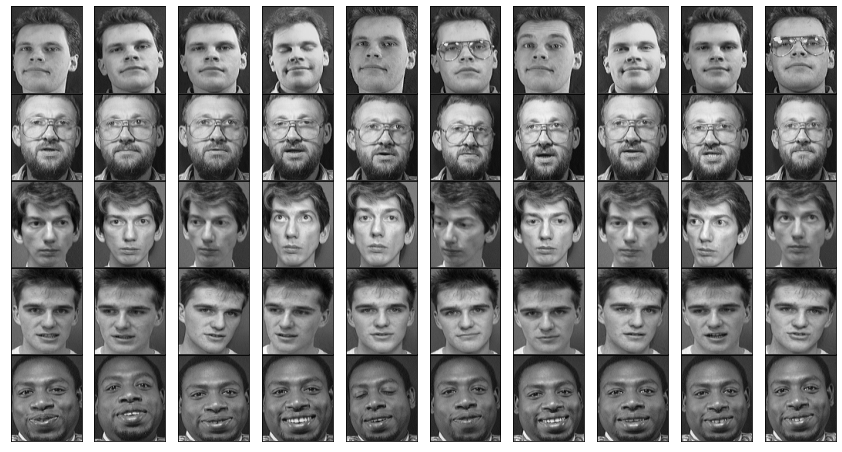

In [56]:
fig, axes = plt.subplots(5, 10, figsize = (15, 8),
                        subplot_kw = {'xticks':[], 'yticks':[]},
                        gridspec_kw = dict(hspace = 0.01, wspace = 0.01))

for i, ax in enumerate(axes.flat):
    ax.imshow(proyeccion[i].reshape(112,92), cmap = 'gray')

In [59]:
matriz = np.array([[3,4],[3,2]])
autovalores, autovectores = np.linalg.eig(matriz)
print(autovalores)
print(autovectores)

[ 6. -1.]
[[ 0.8        -0.70710678]
 [ 0.6         0.70710678]]
